# 目標

 - svm の実装
 - 主問題の実装

https://www.cvxpy.org/examples/machine_learning/svm.html
https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
https://stackoverflow.com/questions/60606336/getting-dcperror-when-trying-to-solve-dual-form-of-svm-using-cvxpy
https://www.cvxpy.org/tutorial/advanced/index.html
https://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/#duality-soft-margin-classifier


In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import cvxpy as cp

In [118]:
L_1 = [(.1, .5, -1), (.4, .4, -1), (.3, .8, 1), (.9, .7, 1)]
L_2 = [(.1, .3, -1), (.6, .4, -1), (.2, .8, 1), (.7, .6, 1)]
L_3 = [(.4, .2, -1), (.9, .3, -1), (.2, .6, 1), (.5, .7, 1)]

U = [(.1, .5), (.3, .7), (.5, .4), (.8, .3), (.9, .2), (1, .5)] # U_1 = U_2 = U_3 = U ということでいいのか

U = np.array(U).T

x_L_1, y_L_1 = np.array([[x_l[0], x_l[1]] for x_l in L_1]).T, np.array([[y_l[2]] for y_l in L_1]).T
x_L_2, y_L_2 = np.array([[x_l[0], x_l[1]] for x_l in L_2]).T, np.array([[y_l[2]] for y_l in L_2]).T
x_L_3, y_L_3 = np.array([[x_l[0], x_l[1]] for x_l in L_3]).T, np.array([[y_l[2]] for y_l in L_3]).T

x_L = [x_L_1, x_L_2, x_L_3]
y_L = [y_L_1, y_L_2, y_L_3]

x_U_1 = U
x_U_2 = U
x_U_3 = U

x_U = [x_U_1, x_U_2, x_U_3]

x_S_1 = np.hstack([x_U_1, x_L_1])
x_S_2 = np.hstack([x_U_2, x_L_2])
x_S_3 = np.hstack([x_U_3, x_L_3])

x_S = [x_S_1, x_S_2, x_S_3]

x_U_tmp = np.hstack([x_U[:2][1], x_U[1:][0]])

In [119]:
len_j = 3
len_l = 4

len_h = 2
len_I_h = 6

len_u = 12

len_s = 10

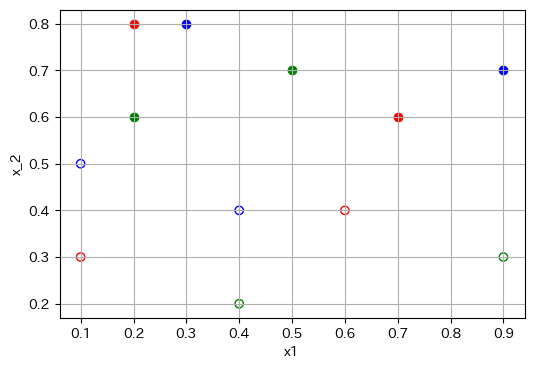

In [33]:
plt.figure(figsize=(6,4))
colors = ['blue', 'red', 'green']

for j in range(len_j):
    for l in range(len_l):
        if y_L[j][0, l] == 1:
            plt.scatter(x_L[j][0, l], x_L[j][1, l], c=colors[j], marker='o', label='1')
        else:
            plt.scatter(x_L[j][0, l], x_L[j][1, l], facecolors='none', edgecolors=colors[j], marker='o', label='-1')


plt.xlabel("x1")
plt.ylabel("x_2")
plt.grid(True)
plt.show()

$f(\beta, v) = \frac{1}{m} \sum_i\left(1 - y_i(\beta^\top x_i - v)\right)_{+} + \lambda ||\beta||_1$

In [189]:
X = np.hstack([x for x in x_L]).T
Y = np.hstack([y for y in y_L]).ravel()

display(X)
print()
display(Y)

array([[0.1, 0.5],
       [0.4, 0.4],
       [0.3, 0.8],
       [0.9, 0.7],
       [0.1, 0.3],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.7, 0.6],
       [0.4, 0.2],
       [0.9, 0.3],
       [0.2, 0.6],
       [0.5, 0.7]])

array([-1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1])

In [190]:
clf = SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

In [191]:
clf.coef_, clf.intercept_

(array([[0.3, 2.1]]), array([-1.155]))

In [228]:
0.3/0.2, -1.155/2.1

(1.4999999999999998, -0.55)

In [188]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))


In [115]:
clf2 = LinearSVC(penalty='l1', dual=False)
clf2.fit(X, Y)

LinearSVC(dual=False, penalty='l1')

In [116]:
clf2.coef_, clf2.intercept_

(array([[0.        , 2.89181481]]), array([-1.47653045]))

In [ ]:
Z = 

In [ ]:
plt.figure(figsize=(6,4))



In [218]:
vals_mesh = np.hstack([xx1.ravel().reshape(-1,1), 
                 xx2.ravel().reshape(-1,1)]) 
Z = clf.predict(vals_mesh)

In [219]:
Z = Z.reshape(xx1.shape)

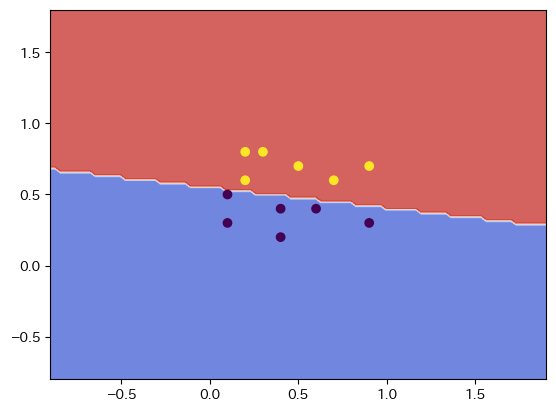

In [220]:
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:, 1], c=Y)

In [217]:
# グローバルな変数を関数の中でいきなり使うのは不自然か
# 引数として渡したほうが良いか

def classifier(x, b=None):
    tmp = 0
    for i in range(len(X)):
        tmp += alpha.value[i][0] * Y[i] * k(x, X[i])

    if b is None:
        b_candidates = []
        for i in range(len(X)):
            b_cand = 0
            for j in range(len(X)):
                b_cand += alpha.value[j][0] * Y[j] * k(X[i], X[j])
            b_candidates.append(1 - b_cand)

        b = max(b_candidates)
    
    tmp += b

    if tmp >= 0:
        return 1
    else:
        return -1

In [226]:
tmp = []
for val in vals_mesh:
    tmp.append(classifier(val, b=0.8775))

np.array(tmp).reshape(xx1.shape)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [225]:
Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [221]:
classifier(vals_mesh, b=0.9775)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 10000)

# 識別機の自作 ー＞ meshgrid に対して予測 ー＞ 決定領域の可視化


## primal (cvxpy)

In [106]:
w = cp.Variable((2,1))
b = cp.Variable()
m = len(X)
loss = cp.sum(cp.pos(1 - cp.multiply(Y.T, X.T @ w - b)))
reg = cp.norm(w, 1)
# lmbda = cp.Parameter(nonneg=True)
lmbda = 1
problem = cp.Problem(cp.Minimize(loss/m + lmbda*reg))

In [107]:
problem.solve()

5.833333337824229

In [108]:
w.value

array([[5.61357302e-10],
       [3.33333325e+00]])

In [109]:
b.value

array(1.66666663)

In [229]:
5.61357302e-10 / 3.33333325e+00, 1.66/3.33333325e+00

(1.6840719481017987e-10, 0.4980000124500003)

## dual (cvxpy)

In [122]:
X = np.hstack([x for x in x_L]).T
Y = np.hstack([y for y in y_L]).ravel()
X, Y

(array([[0.1, 0.5],
        [0.4, 0.4],
        [0.3, 0.8],
        [0.9, 0.7],
        [0.1, 0.3],
        [0.6, 0.4],
        [0.2, 0.8],
        [0.7, 0.6],
        [0.4, 0.2],
        [0.9, 0.3],
        [0.2, 0.6],
        [0.5, 0.7]]),
 array([-1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1]))

In [140]:
A = np.zeros((len(X), len(X)))
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [141]:
for i in range(len(X)):
    for j in range(len(X)):
        A[i,j] = Y[i] * Y[j] * k(X[i], X[j])

A

array([[ 0.26,  0.24, -0.43, -0.44,  0.16,  0.26, -0.42, -0.37,  0.14,
         0.24, -0.32, -0.4 ],
       [ 0.24,  0.32, -0.44, -0.64,  0.16,  0.4 , -0.4 , -0.52,  0.24,
         0.48, -0.32, -0.48],
       [-0.43, -0.44,  0.73,  0.83, -0.27, -0.5 ,  0.7 ,  0.69, -0.28,
        -0.51,  0.54,  0.71],
       [-0.44, -0.64,  0.83,  1.3 , -0.3 , -0.82,  0.74,  1.05, -0.5 ,
        -1.02,  0.6 ,  0.94],
       [ 0.16,  0.16, -0.27, -0.3 ,  0.1 ,  0.18, -0.26, -0.25,  0.1 ,
         0.18, -0.2 , -0.26],
       [ 0.26,  0.4 , -0.5 , -0.82,  0.18,  0.52, -0.44, -0.66,  0.32,
         0.66, -0.36, -0.58],
       [-0.42, -0.4 ,  0.7 ,  0.74, -0.26, -0.44,  0.68,  0.62, -0.24,
        -0.42,  0.52,  0.66],
       [-0.37, -0.52,  0.69,  1.05, -0.25, -0.66,  0.62,  0.85, -0.4 ,
        -0.81,  0.5 ,  0.77],
       [ 0.14,  0.24, -0.28, -0.5 ,  0.1 ,  0.32, -0.24, -0.4 ,  0.2 ,
         0.42, -0.2 , -0.34],
       [ 0.24,  0.48, -0.51, -1.02,  0.18,  0.66, -0.42, -0.81,  0.42,
         0.9 , -0.36

In [142]:
cp.quad_form(alpha, A)

Expression(CONVEX, NONNEGATIVE, (1, 1))

In [181]:
alpha = cp.Variable((len(X), 1))
k = lambda x1, x2: x1.T @ x2
lmbda = 1

obj_func = cp.sum(alpha) 

A = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        A[i,j] = Y[i] * Y[j] * k(X[i], X[j])

obj_func -= 1/2 * cp.quad_form(alpha, A)

objective = cp.Maximize(obj_func)

constraint1 = 0
for i in range(len(Y)):
    constraint1 += alpha[i] * Y[i]

constraints = [
    constraint1 == 0,
    # cp.multiply(alpha, Y.reshape(12,1)) == 0,
    alpha >= 0,
    alpha <= 1/(2*len(X)*lmbda)
]

problem = cp.Problem(objective, constraints)

In [182]:
objective

Maximize(Expression(CONCAVE, UNKNOWN, (1, 1)))

In [183]:
result = problem.solve()

In [184]:
alpha.value

array([[0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667],
       [0.04166667]])

In [185]:
w = 0
for i in range(len(X)):
    w += alpha.value[i][0] * Y[i] * X[i]

w

array([0.0125, 0.0875])

In [231]:
0.0125/0.0875, 0.14285714285714288/0.0875

(0.14285714285714288, 1.63265306122449)

In [186]:
b = 0
for i in range(len(X)):
    b += Y[i] - w @ X[i]
    
b /= len(X)
b

-0.051458333333333356

In [187]:
Y

array([-1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1])

In [178]:
w.T

array([-3.30779271e-07,  7.69091780e-07])

In [158]:
alpha.value

array([[9.14555179e-07],
       [8.53153245e-07],
       [5.91882237e-07],
       [5.28318525e-07],
       [8.58107432e-07],
       [8.31034538e-07],
       [5.80822884e-07],
       [6.75876575e-07],
       [7.96705498e-07],
       [7.62049831e-07],
       [6.37270631e-07],
       [6.42224818e-07]])

In [134]:
len(Y)

12

In [124]:
tmp1 = np.array([1,2])
tmp2 = np.array([3,4])

tmp1.T @ tmp2

11

In [126]:
alpha = cp.Variable((len(X), 1))
alpha

Variable((12, 1))

In [127]:
alpha[0]

Expression(AFFINE, UNKNOWN, (1,))

In [128]:
alpha[1]

Expression(AFFINE, UNKNOWN, (1,))

In [129]:
alpha[11]

Expression(AFFINE, UNKNOWN, (1,))